# ch.09

## 09-1

In [1]:
install.packages("foreign")  # foreign 패키지 설치

library(foreign)             # SPSS 파일 로드
library(dplyr)               # 전처리
library(ggplot2)             # 시각화
library(readxl)              # 엑셀 파일 불러오기

Installing package into 'C:/Users/bcduc/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bcduc\AppData\Local\Temp\RtmpeS0NZl\downloaded_packages


Warning message:
"package 'foreign' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
getwd()

[1] "C:/Users/bcduc/Desktop/BigData/R_class"

In [5]:
# 데이터 불러오기
# read => 파일 종류마다 읽어 올 수 있는게 엄청 많다
raw_welfare <- read.spss(file = "../data(big_size)/Koweps_hpc10_2015_beta1.sav",
                         to.data.frame = T)

Warning message in read.spss(file = "../data(big_size)/Koweps_hpc10_2015_beta1.sav", :
"../data(big_size)/Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [6]:
# 복사본 만들기
welfare = raw_welfare

In [7]:
# 데이터 확인
dim(welfare)

[1] 16664   957

In [8]:
head(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
5,4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


In [9]:
tail(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16659,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,7163,0,NA
16660,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16661,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,3630,NA,NA,0,NA
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,700,NA,0,NA
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


In [10]:
# Jupyter에서는 지원이 되지 않는다고 한다.
View(welfare)

ERROR: Error in View(welfare): 'View()' not yet supported in the Jupyter R kernel


In [11]:
str(welfare)

'data.frame':	16664 obs. of  957 variables:
 $ h10_id          : num  1 2 3 4 4 6 6 6 6 6 ...
 $ h10_ind         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_sn          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_merkey      : num  10101 20101 30101 40101 40101 ...
 $ h_new           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h10_cobf        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h10_reg5        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_reg7        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_din         : num  864 600 1571 3579 3579 ...
 $ h10_cin         : num  864 600 1619 3687 3687 ...
 $ h10_flag        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ p10_wgl         : num  777 960 1059 1012 1075 ...
 $ p10_wsl         : num  0.257 0.317 0.35 0.334 0.355 ...
 $ p10_wgc         : num  764 949 1048 992 1057 ...
 $ p10_wsc         : num  0.252 0.314 0.346 0.328 0.349 ...
 $ h10_hc          : num  2 2 1 1 1 1 1 1 1 1 ...
 $ nh1001_1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh1001_2        : num  NA NA NA NA NA NA NA

In [12]:
welfare <- welfare %>% rename(
    sex = h10_g3,                # 성별
    birth = h10_g4,              # 태어난 연도
    marriage = h10_g10,          # 혼인 상태
    religion = h10_g11,          # 종교
    income = p1002_8aq1,         # 월급
    code_job = h10_eco9,         # 직종 코드
    code_region = h10_reg7       # 지역 코드

)

## 09-2

In [13]:
class(welfare$sex)
table(welfare$sex)

[1] "numeric"


   1    2 
7578 9086 

In [14]:
# 이상치 확인
table(welfare$sex)


   1    2 
7578 9086 

In [15]:
# 이상치 결측 처리
# 브로드 캐스팅이 자동으로 이루어짐
# welfare$sex에서 해당 행의 데이터와 알아서 매칭 일어남
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [16]:
# 결측치 확인
table(is.na(welfare$sex))


FALSE 
16664 


female   male 
  9086   7578 

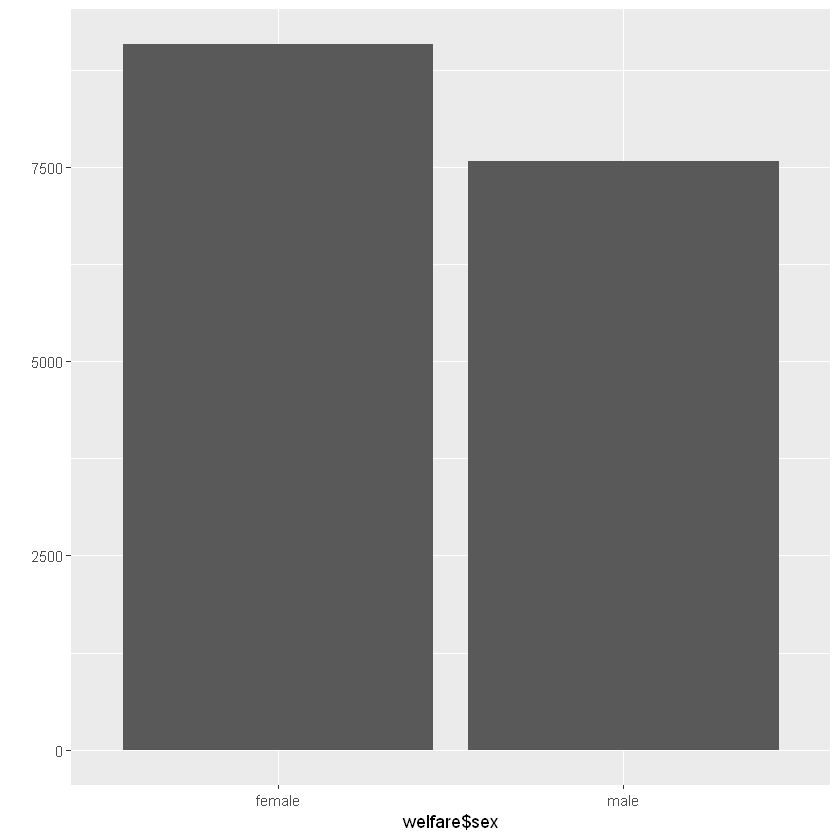

In [17]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, 'male', 'female')
table(welfare$sex)
qplot(welfare$sex)

In [18]:
# 데이터 -> income의 결측치가 아닌 데이터를 필터 -> 성별로 그루핑 -> mean_income 도출
sex_income = welfare %>% filter(!is.na(income)) %>% group_by(sex) %>% summarise(mean_income = mean(income), count = n()) 

In [19]:
sex_income

sex,mean_income,count
<chr>,<dbl>,<int>
female,162.1997,2182
male,312.2932,2452


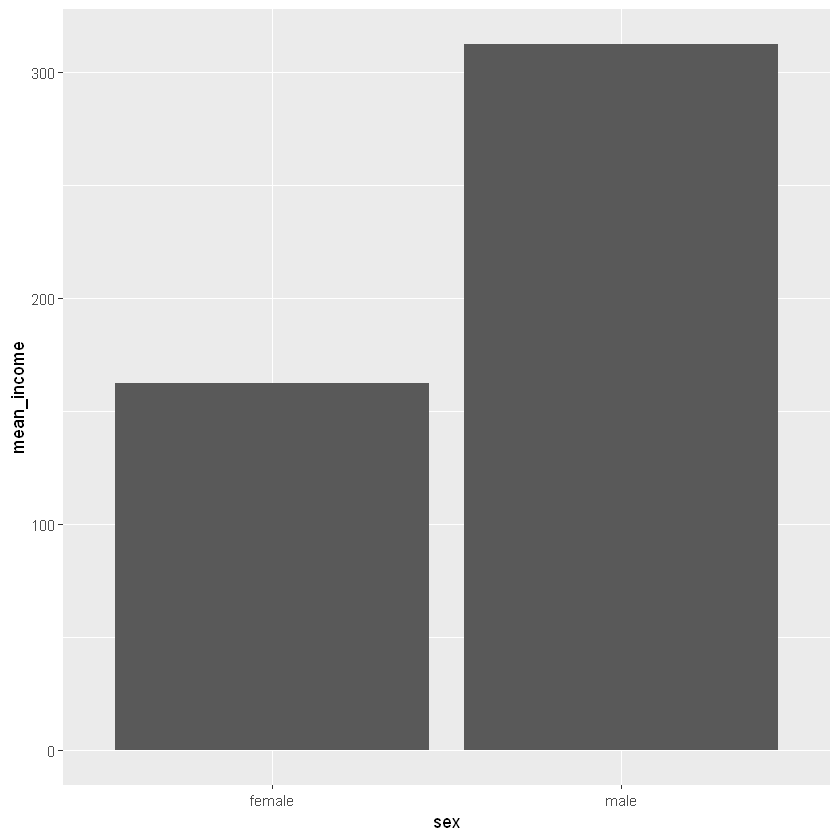

In [20]:
# aes => axes 
# 그래프 종류
# geom_point()
# geop_col()
# geop_bar()
# geop_line()
# geop_boxplot()
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

In [21]:
geom

ERROR: Error in eval(expr, envir, enclos): 객체 'geom'를 찾을 수 없습니다


## 09-3

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


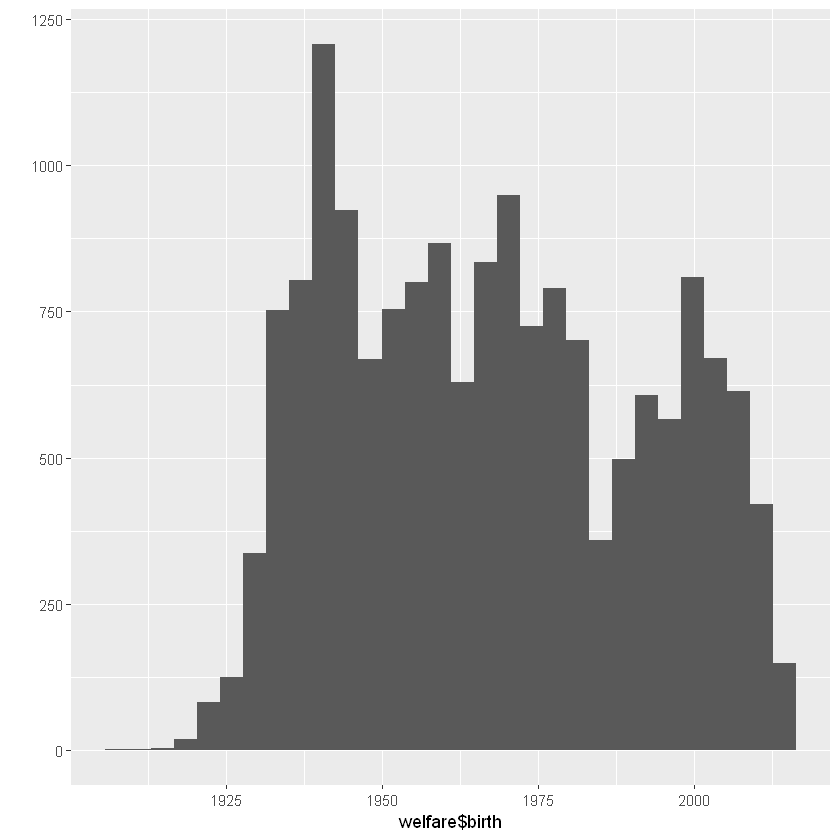

In [22]:
class(welfare$birth)
summary(welfare$birth)
qplot(welfare$birth)

In [23]:
# 이상치 확인
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

In [24]:
# 결측치 확인
table(is.na(welfare$birth))


FALSE 
16664 

In [25]:
# 이상치 결측 처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth)
table(is.na(welfare$birth))


FALSE 
16664 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


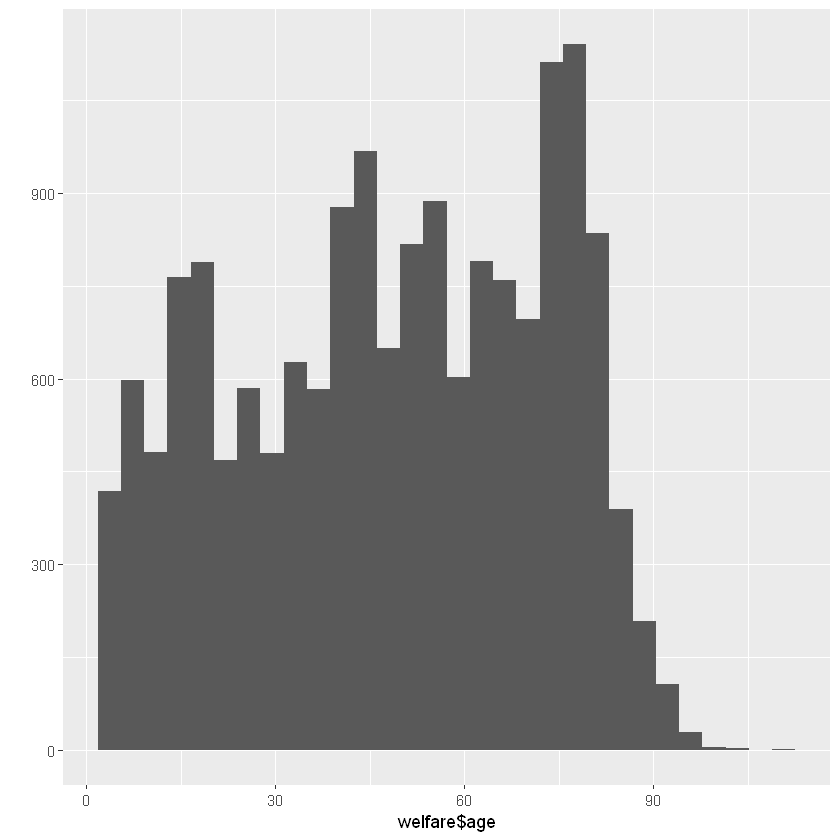

In [26]:
# 나이 계산해서 넣기
welfare$age <- 2015 - welfare$birth + 1
summary(welfare$age)
qplot(welfare$age)

In [27]:
age_income <- welfare %>% filter(!is.na(income)) %>% group_by(age) %>% summarise(mean_income = mean(income))

In [28]:
age_income %>% head()

age,mean_income
<dbl>,<dbl>
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


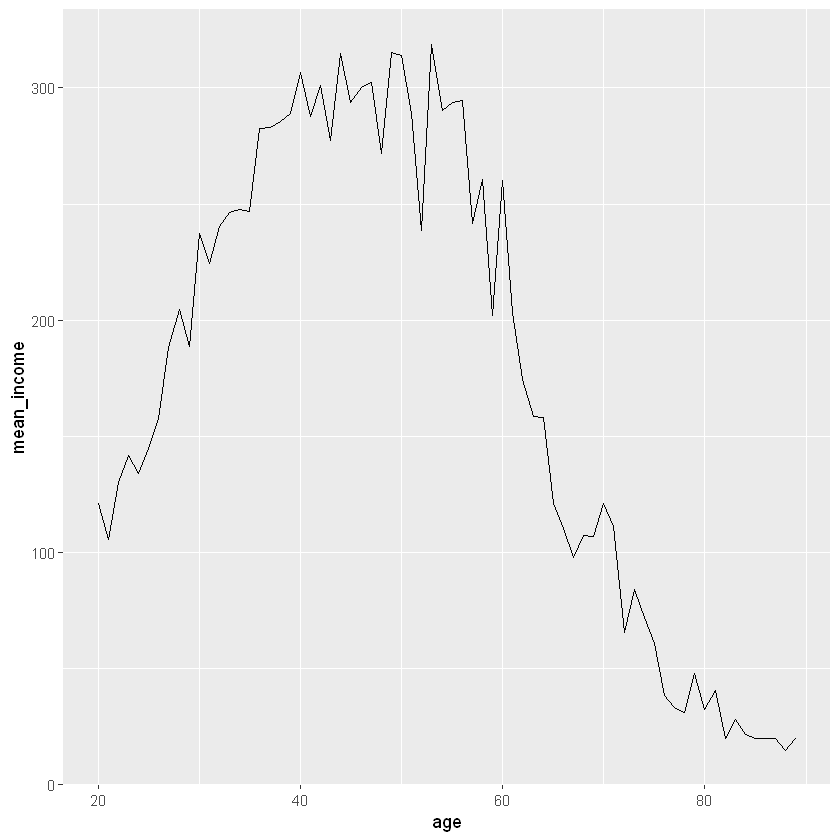

In [29]:
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()

## 09-4

In [30]:
welfare <- welfare %>% mutate(ageg = ifelse(age < 30, 'young', ifelse(age <= 59, 'middle', 'old')))


middle    old  young 
  6049   6281   4334 

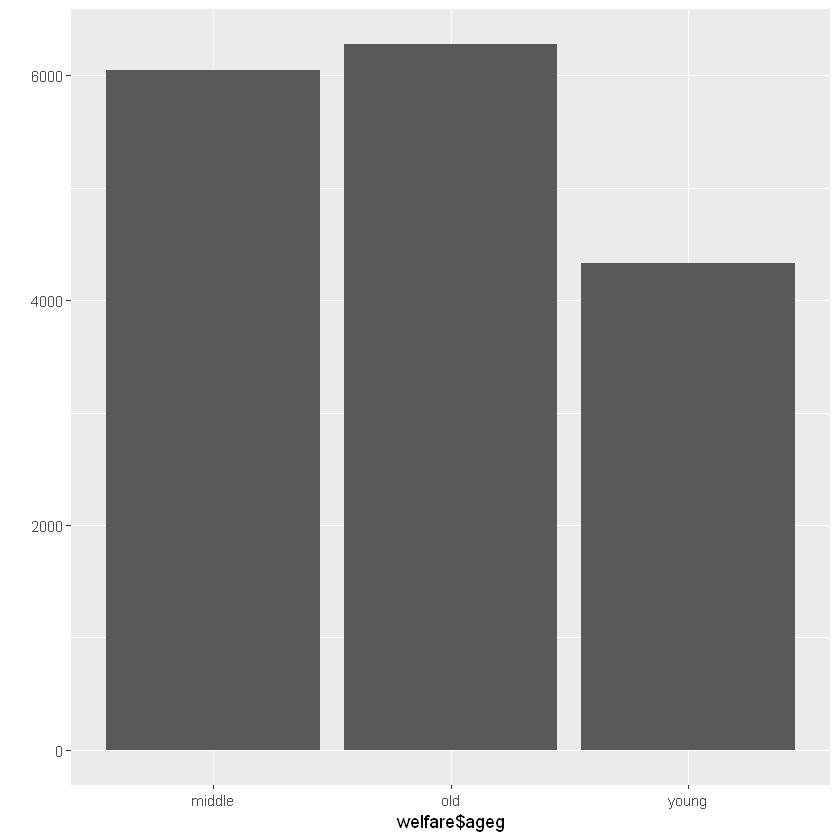

In [31]:
table(welfare$ageg)
qplot(welfare$ageg)

In [32]:
ageg_income <- welfare %>% filter(!is.na(income)) %>% group_by(ageg) %>% summarise(mean_income = mean(income))

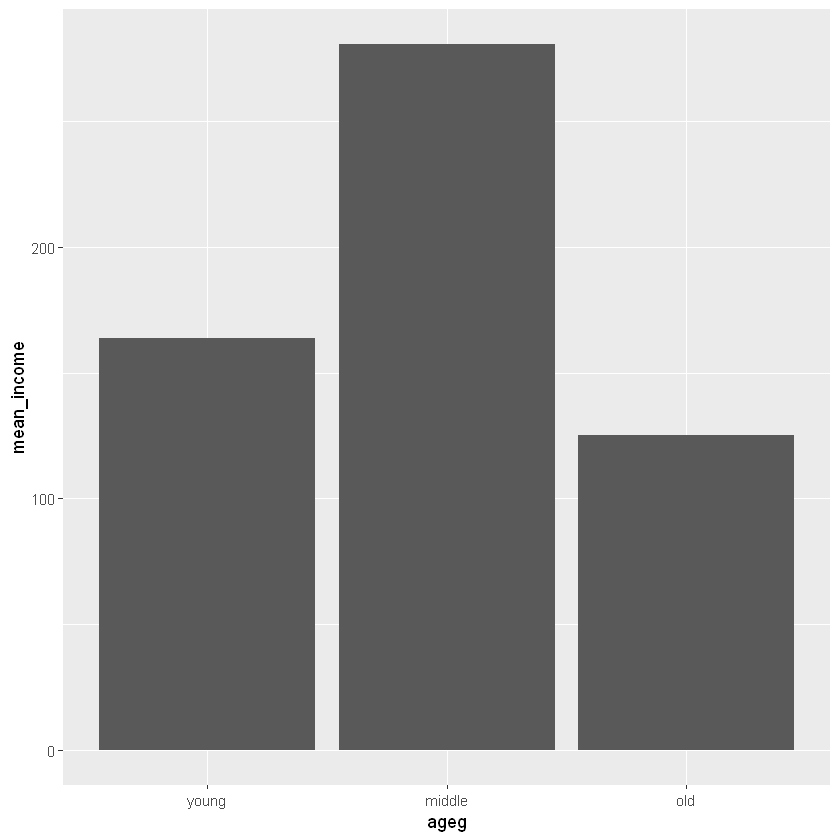

In [33]:
# scale_x_discrete(limits = c('young', 'middle', 'old'))
# x축의 데이터를 위와 같은 순서로 정렬 할 때 사용 하는 함수
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col () + scale_x_discrete(limits = c('young', 'middle', 'old'))

## 09-5

In [34]:
sex_income = welfare %>% filter(!is.na(income)) %>% group_by(ageg, sex) %>% summarise(mean_income = mean(income))
sex_income

ageg,sex,mean_income
<chr>,<chr>,<dbl>
middle,female,186.16309
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


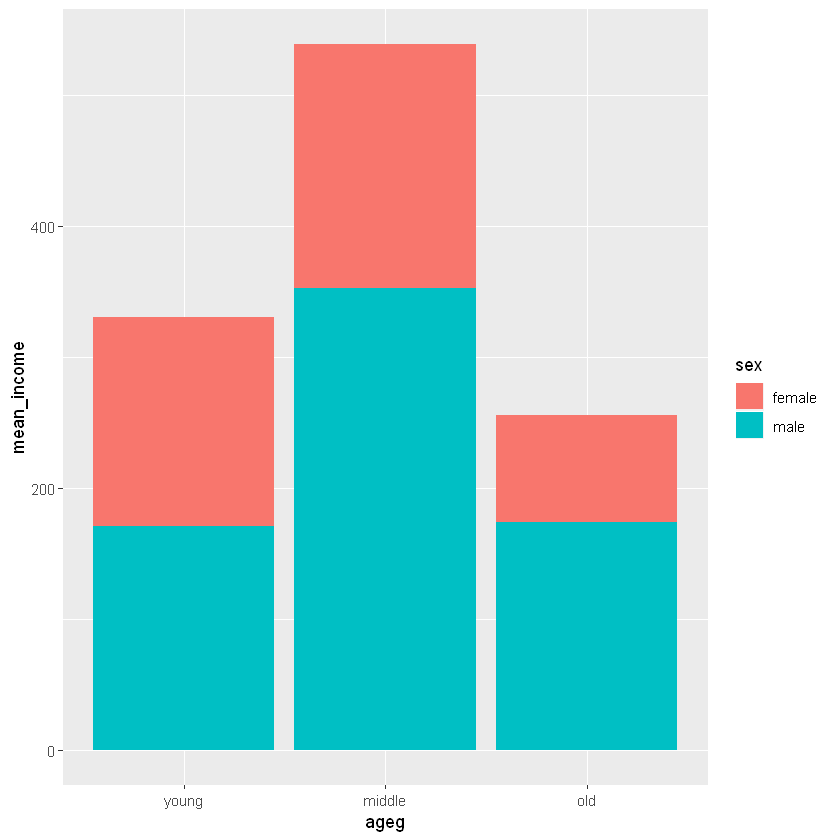

In [35]:
# fill의 기능 확인 해보기
# fill은 sex가 female과 male로 구분 되어 있으니까 그 둘을 구분해서 보여주는 기능
ggplot(data = sex_income, aes(x = ageg ,y = mean_income,  fill = sex)) + geom_col() + scale_x_discrete(limits = c('young', 'middle', 'old'))

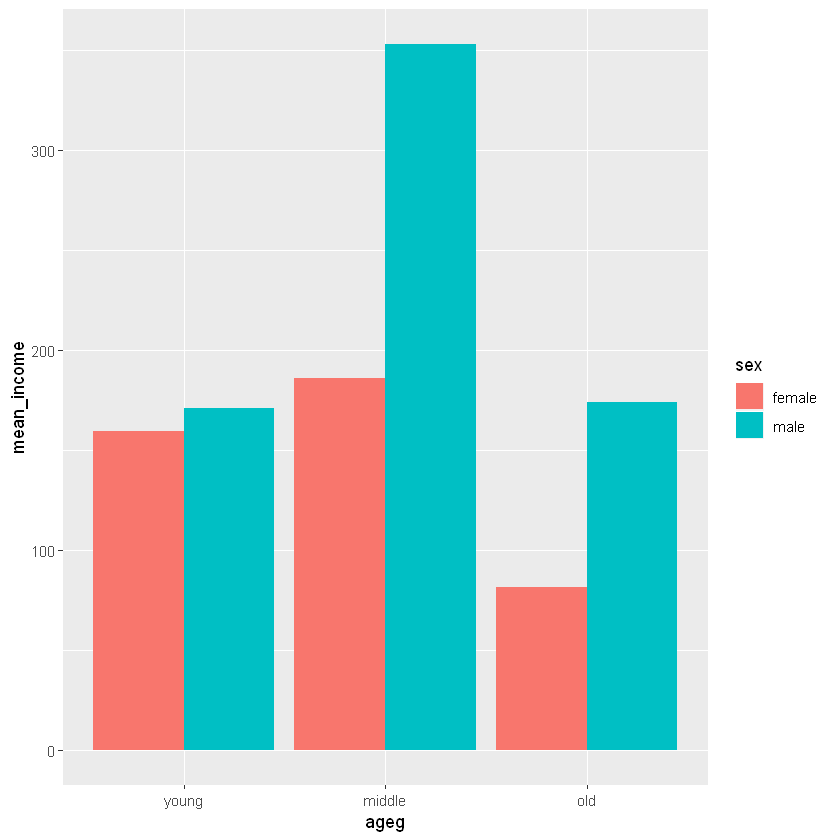

In [36]:
# geom_col의 position 인자는 그래프상의 female과 male을 어떻게 배치 해서 그래프로 만들 것인지를 정하는 인자
ggplot(data = sex_income, aes(x = ageg ,y = mean_income,  fill = sex)) + geom_col(position = 'dodge') + scale_x_discrete(limits = c('young', 'middle', 'old'))

In [37]:
# 성별 연령별 월급 평균표 만들기
# 파이썬과 달리 R에서는 컬럼명을 가져올때, 문자열이 아닌 변수명으로 취급 ('age' : X, age : O)
sex_age = welfare %>% filter(!is.na(income)) %>% group_by(age, sex) %>% summarise(mean_income = mean(income))
sex_age %>% head()

age,sex,mean_income
<dbl>,<chr>,<dbl>
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


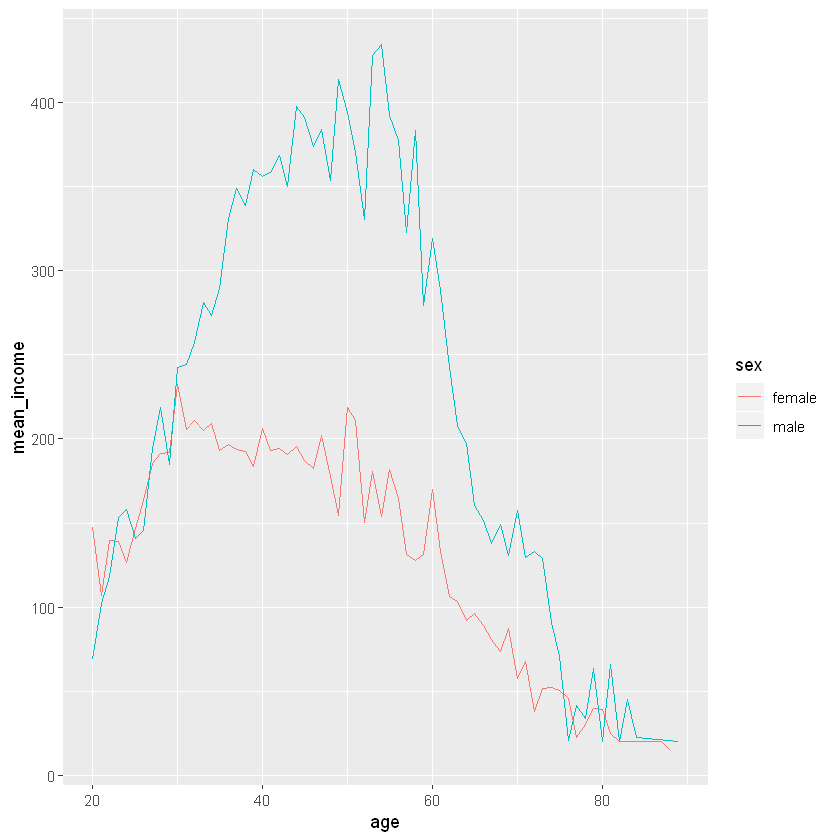

In [38]:
# 그래프 만들기
# ggplot(data = sex_age, aes(x= age, y= mean_income,  fill = sex)) + geom_col()
# 위의 그래프랑 아래의 그래프 모양과 변수를 비교해보자. => 개념은 같은데 인자가 조금씩 다르다
ggplot(data = sex_age, aes(x= age, y= mean_income,  col = sex)) + geom_line()

## 09-6

In [39]:
class(welfare$code_job)
table(welfare$code_job)

[1] "numeric"


 111  120  131  132  133  134  135  139  141  149  151  152  153  159  211  212 
   2   16   10   11    9    3    7   10   35   20   26   18   15   16    8    4 
 213  221  222  223  224  231  232  233  234  235  236  237  239  241  242  243 
   3   17   31   12    4   41    5    3    6   48   14    2   29   12    4   63 
 244  245  246  247  248  251  252  253  254  259  261  271  272  273  274  281 
   4   33   59   77   38   14  111   24   67  109    4   15   11    4   36   17 
 283  284  285  286  289  311  312  313  314  320  330  391  392  399  411  412 
   8   10   26   16    5  140  260  220   84   75   15    4   13   87   47   12 
 421  422  423  429  431  432  441  442  510  521  522  530  611  612  613  620 
 124   71    5   14   20   33  154  197  192  353    5  106 1320   11   40    2 
 630  710  721  722  730  741  742  743  751  752  753  761  762  771  772  773 
  20   29   30   22   16   27    3   34   34    5   49   69   27   11   61   86 
 774  780  791  792  799  8

In [40]:
# reaxl 라이브라리 불러오기
library(readxl)

In [41]:
list_job = read_excel('Doit_R/Data/Koweps_Codebook.xlsx', col_names = T, sheet = 2)
list_job %>% head()
list_job %>% dim()

code_job,job
<dbl>,<chr>
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자


[1] 149   2

In [42]:
# left_join => pandas에서 merge와 같은 기능
# welfare 테이블에 code_job이라는 컬럼이 있다.
# list_job이라는 파일에 code_job컬럼과 각각의 값에 대응 하는 job 칼럼이 있다.
welfare = welfare %>% left_join(list_job, id = 'code_job')

Joining, by = "code_job"

In [43]:
job_income <- welfare %>% filter(!is.na(job) & !is.na(income)) %>% group_by(job) %>% summarise(mean_income = mean(income))
job_income %>% head()

job,mean_income
<chr>,<dbl>
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [44]:
# git 잘 작동하고 있는지 체크 하자